In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings #to remove warning message
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Crop_recommendation.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
data["N"].value_counts()

N
22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: count, Length: 137, dtype: int64

In [6]:
data["N"].unique()

array([ 90,  85,  60,  74,  78,  69,  94,  89,  68,  91,  93,  77,  88,
        76,  67,  83,  98,  66,  97,  84,  73,  92,  95,  99,  63,  62,
        64,  82,  79,  65,  75,  71,  72,  70,  86,  61,  81,  80, 100,
        87,  96,  40,  23,  39,  22,  36,  32,  58,  59,  42,  28,  43,
        27,  50,  25,  31,  26,  54,  57,  49,  46,  38,  35,  52,  44,
        24,  29,  20,  56,  37,  51,  41,  34,  30,  33,  47,  53,  45,
        48,  13,   2,  17,  12,   6,  10,  19,  11,  18,  21,  16,   9,
         1,   7,   8,   0,   3,   4,   5,  14,  15,  55, 105, 108, 118,
       101, 106, 109, 117, 114, 110, 112, 111, 102, 116, 119, 107, 104,
       103, 120, 113, 115, 133, 136, 126, 121, 129, 122, 140, 131, 135,
       123, 125, 139, 132, 127, 130, 134], dtype=int64)

In [7]:
data["P"].value_counts()

P
60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: count, Length: 117, dtype: int64

In [8]:
data["P"].unique()

array([ 42,  58,  55,  35,  37,  53,  54,  46,  56,  50,  48,  38,  45,
        40,  59,  41,  47,  49,  51,  57,  39,  43,  44,  60,  52,  36,
        72,  67,  73,  70,  62,  74,  66,  63,  71,  78,  80,  68,  65,
        77,  76,  79,  61,  64,  69,  75,  24,  18,  26,  27,  25,  21,
        30,  11,   5,  10,   7,  20,  22,  15,  23,   8,  16,  29,  17,
         6,  19,  13,   9,  14,  28,  94,  95,  92,  89,  88,  87,  85,
        86,  83,  91,  81,  84,  90,  82,  93,  33,  31,  34,  32, 130,
       144, 123, 125, 131, 140, 122, 134, 145, 139, 141, 138, 136, 132,
       133, 121, 126, 120, 142, 135, 129, 128, 137, 127, 124, 143,  12],
      dtype=int64)

In [9]:
data["K"].unique()

array([ 43,  41,  44,  40,  42,  38,  36,  37,  39,  35,  45,  16,  17,
        21,  20,  19,  25,  22,  15,  18,  23,  24,  77,  84,  85,  81,
        75,  79,  76,  83,  78,  80,  82,  46,  50,  53,  54,  49,  55,
        52,  47,  48,  51,  27,  31,  32,  34,  33,  30,  28,  29,  26,
       195, 204, 205, 196, 198, 197, 203, 201, 202, 199, 200,  12,  13,
         6,   9,  10,  14,   8,   7,   5,  11], dtype=int64)

In [10]:
data["K"].value_counts().head(10)

K
17    90
22    87
15    86
20    80
25    78
19    77
21    74
18    72
45    65
23    63
Name: count, dtype: int64

In [11]:
data["temperature"].value_counts()

temperature
20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: count, Length: 2200, dtype: int64

In [12]:
data["temperature"].unique()

array([20.87974371, 21.77046169, 23.00445915, ..., 24.13179691,
       26.2724184 , 23.60301571])

In [13]:
data["humidity"].value_counts()

humidity
82.002744    1
90.336987    1
93.907412    1
91.473558    1
94.037115    1
            ..
66.637972    1
61.532786    1
61.692951    1
69.090478    1
60.396475    1
Name: count, Length: 2200, dtype: int64

In [14]:
data["humidity"].unique()

array([82.00274423, 80.31964408, 82.3207629 , ..., 67.22512329,
       52.12739421, 60.39647474])

In [15]:
data["ph"].value_counts()

ph
6.502985    1
6.640471    1
6.251420    1
6.274453    1
6.135996    1
           ..
7.538631    1
7.127064    1
6.628265    1
6.726469    1
6.779833    1
Name: count, Length: 2200, dtype: int64

In [16]:
data["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [17]:
data["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [18]:
data.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [19]:
data.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
61,83,58,45,25.755286,83.518271,5.875346,245.662680,rice
1125,12,37,30,31.097791,47.411967,4.546466,90.286243,mango
1763,70,65,52,30.420121,93.126598,6.583529,75.952950,papaya
50,60,36,43,23.431219,83.063101,5.286204,219.904835,rice
463,14,75,24,24.547578,57.341448,6.436160,118.360656,pigeonpeas
180,90,52,25,25.974824,69.363857,6.822587,103.223421,maize
898,34,73,15,20.971953,63.831799,7.630424,53.102079,lentil
1782,48,62,47,25.347561,93.028711,6.803095,174.401234,papaya
211,43,66,79,19.462340,15.225390,7.976608,74.585651,chickpea
1464,111,5,47,28.033065,91.473558,6.274453,21.179248,muskmelon


In [20]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [21]:
total_nitrogen = data["N"].nunique()#gives the count of unique value
total_nitrogen

137

In [22]:
total_nitrogen = data["P"].nunique()#gives the count of unique value
total_nitrogen

117

In [23]:
total_nitrogen = data["P"].unique()
total_nitrogen

array([ 42,  58,  55,  35,  37,  53,  54,  46,  56,  50,  48,  38,  45,
        40,  59,  41,  47,  49,  51,  57,  39,  43,  44,  60,  52,  36,
        72,  67,  73,  70,  62,  74,  66,  63,  71,  78,  80,  68,  65,
        77,  76,  79,  61,  64,  69,  75,  24,  18,  26,  27,  25,  21,
        30,  11,   5,  10,   7,  20,  22,  15,  23,   8,  16,  29,  17,
         6,  19,  13,   9,  14,  28,  94,  95,  92,  89,  88,  87,  85,
        86,  83,  91,  81,  84,  90,  82,  93,  33,  31,  34,  32, 130,
       144, 123, 125, 131, 140, 122, 134, 145, 139, 141, 138, 136, 132,
       133, 121, 126, 120, 142, 135, 129, 128, 137, 127, 124, 143,  12],
      dtype=int64)

In [24]:
total_nitrogen = data["K"].unique()
total_nitrogen

array([ 43,  41,  44,  40,  42,  38,  36,  37,  39,  35,  45,  16,  17,
        21,  20,  19,  25,  22,  15,  18,  23,  24,  77,  84,  85,  81,
        75,  79,  76,  83,  78,  80,  82,  46,  50,  53,  54,  49,  55,
        52,  47,  48,  51,  27,  31,  32,  34,  33,  30,  28,  29,  26,
       195, 204, 205, 196, 198, 197, 203, 201, 202, 199, 200,  12,  13,
         6,   9,  10,  14,   8,   7,   5,  11], dtype=int64)

In [25]:
total_nitrogen = data["K"].nunique()
total_nitrogen

73

In [26]:
total_sum_k = data["K"].sum()
total_sum_k

105928

In [27]:
total_SUM_nitrogen = data["N"].sum()
total_SUM_nitrogen

111214

In [28]:
total_SUM_P= data["P"].sum()
total_SUM_P

117398

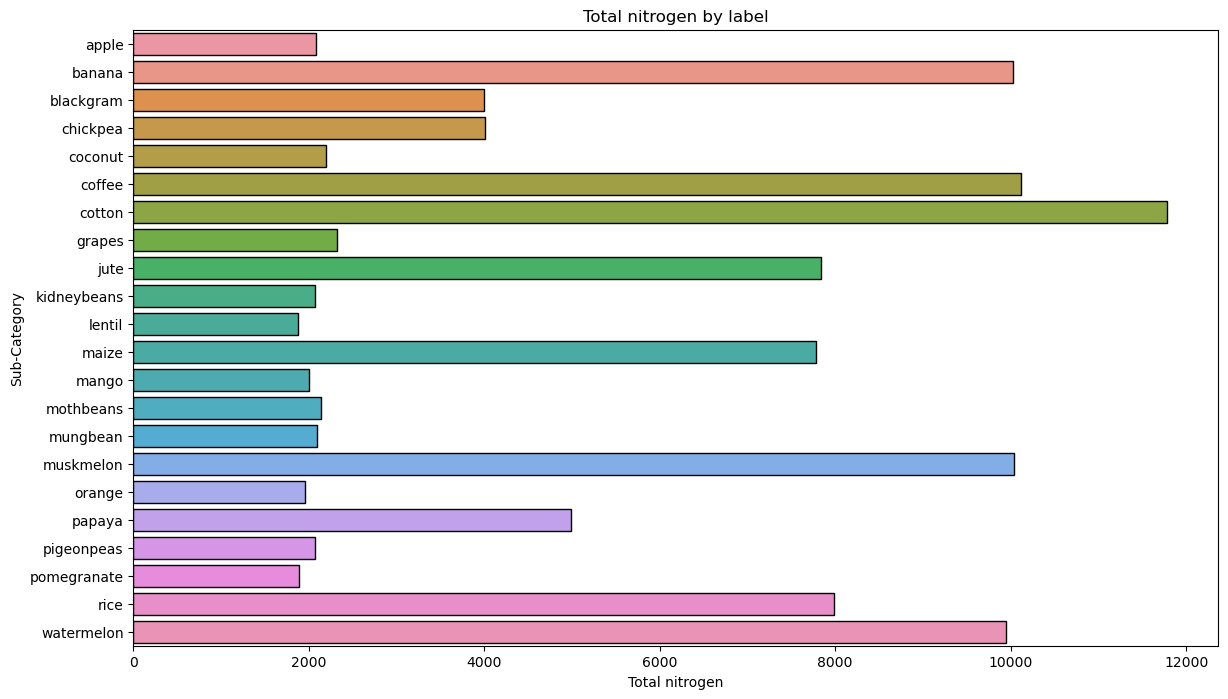

In [29]:
# Calculate total quantity sold by sub-category
nitrogen_label = data.groupby('label')['N'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='N', y='label', data=nitrogen_label,edgecolor='black')
plt.title('Total nitrogen by label')
plt.xlabel('Total nitrogen')
plt.ylabel('Sub-Category')
plt.show()

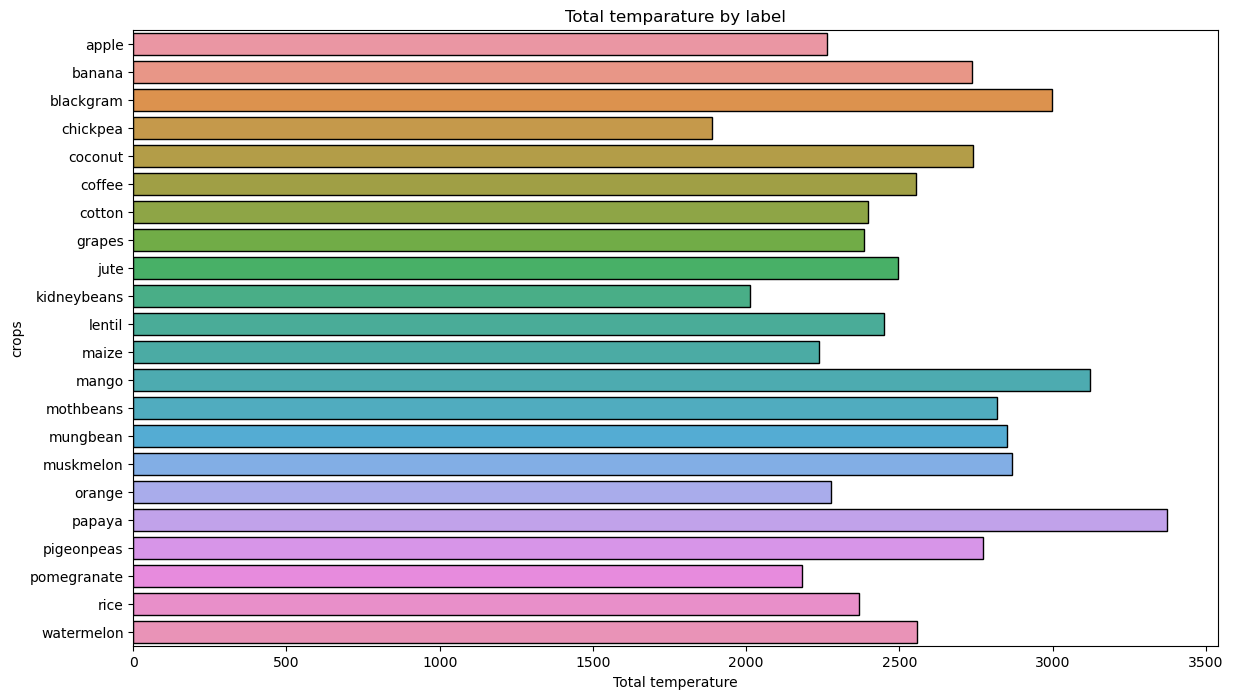

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

label_by_temperature = data.groupby('label')['temperature'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='temperature', y='label', data=label_by_temperature,edgecolor='black')
plt.title('Total temparature by label')
plt.xlabel('Total temperature')
plt.ylabel('crops')
plt.show()

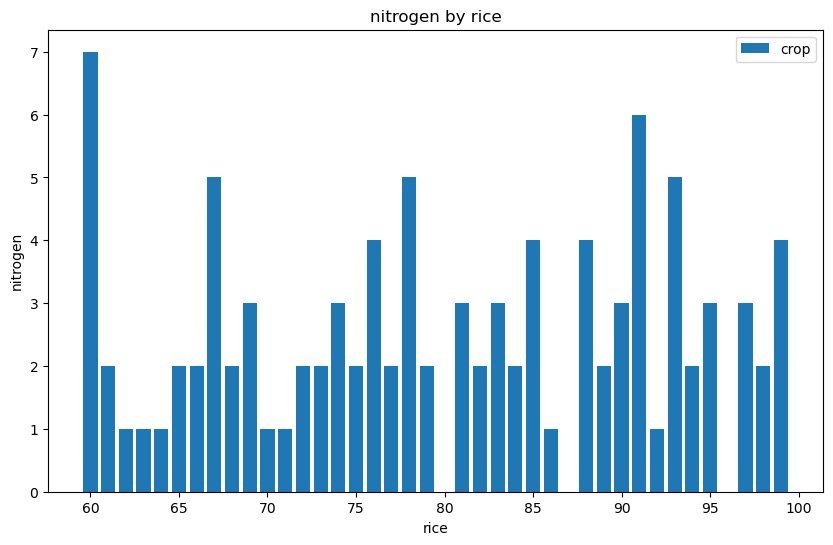

In [31]:
rice=data[data['label'] == 'rice']['N'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(rice.index, rice.values)

plt.title('nitrogen by rice')
plt.xlabel('rice')
plt.ylabel('nitrogen')
plt.legend(['crop'])
plt.show()

                 N      P      K
label                           
apple         2080  13422  19989
banana       10023   8201   5005
blackgram     4002   6747   1924
chickpea      4009   6779   7992
coconut       2198   1693   3059
coffee       10120   2874   2994
cotton       11777   4624   1956
grapes        2318  13253  20011
jute          7840   4686   3999
kidneybeans   2075   6754   2005


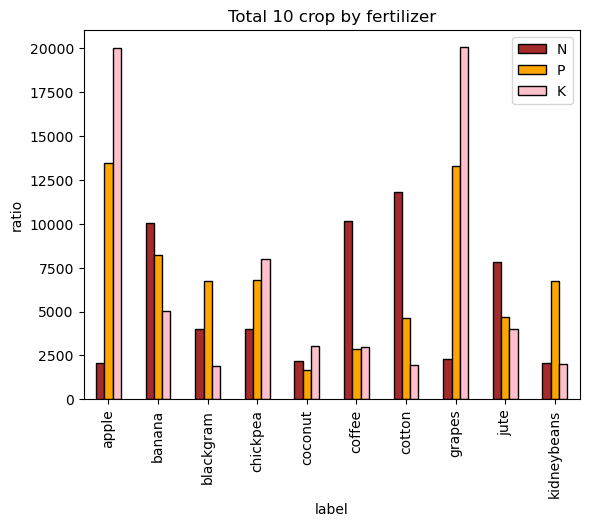

In [32]:
category_data = data.groupby('label')[['N', 'P','K']].sum().head(10)
print(category_data)
category_data.plot(kind='bar',color=['brown','orange','pink'],edgecolor='black')
plt.title('Total 10 crop by fertilizer')
plt.ylabel('ratio')
plt.show()

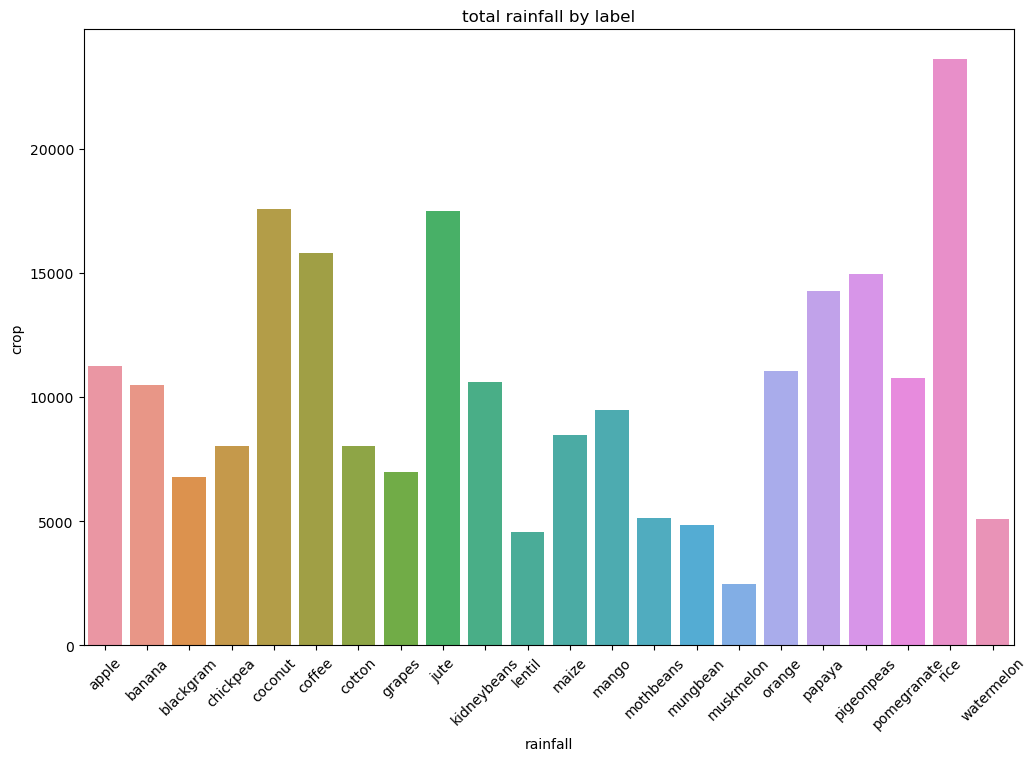

In [33]:
# Calculate total sales per customer
crop_rainfall = data.groupby('label')['rainfall'].sum().reset_index()

# Sort customers by total sales and select bottom 10
#

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='label', y='rainfall', data=crop_rainfall)
plt.title('total rainfall by label')
plt.xlabel('rainfall')
plt.ylabel('crop')
plt.xticks(rotation=45)

plt.show()

In [34]:
data["rainfall"].max()

298.5601175

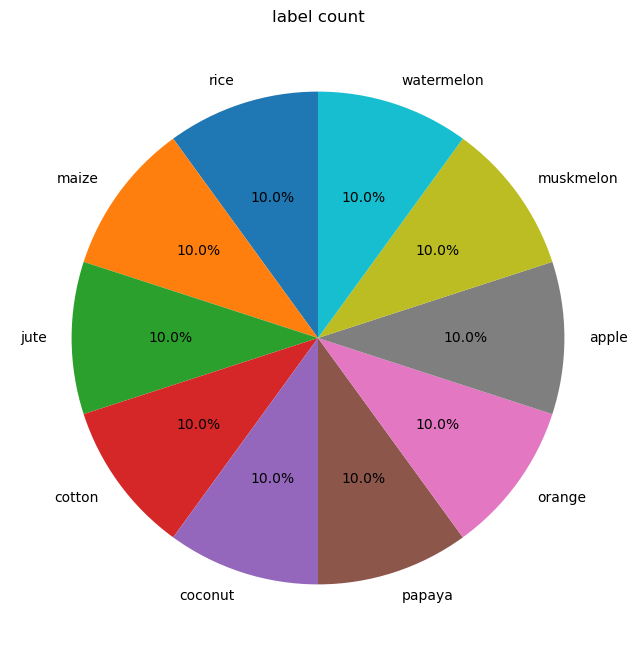

In [35]:
# Cal_culate the number of orders by ship mode
label_crop= data['label'].value_counts().head(10)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_crop,labels=label_crop.index, autopct='%1.1f%%',startangle= 90)
plt.title('label count')
plt.ylabel('')  # Hides the y-label
plt.show()

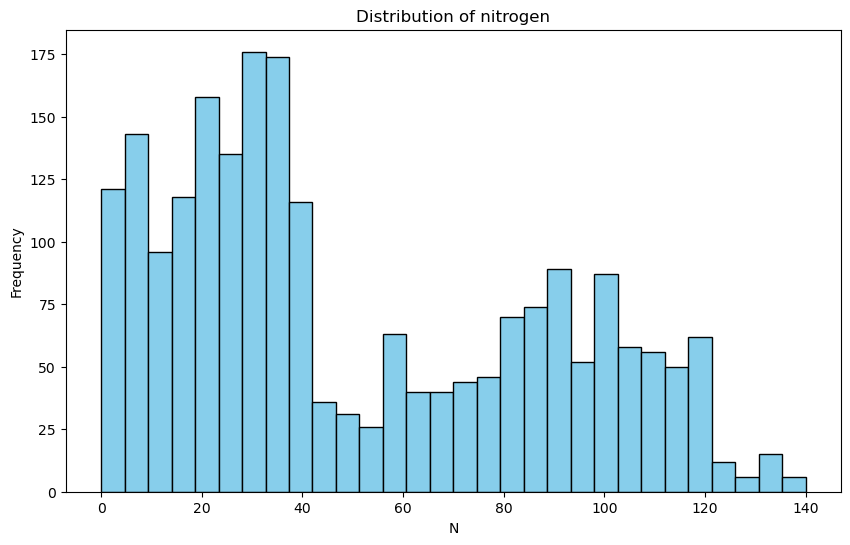

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(data['N'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of nitrogen')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()

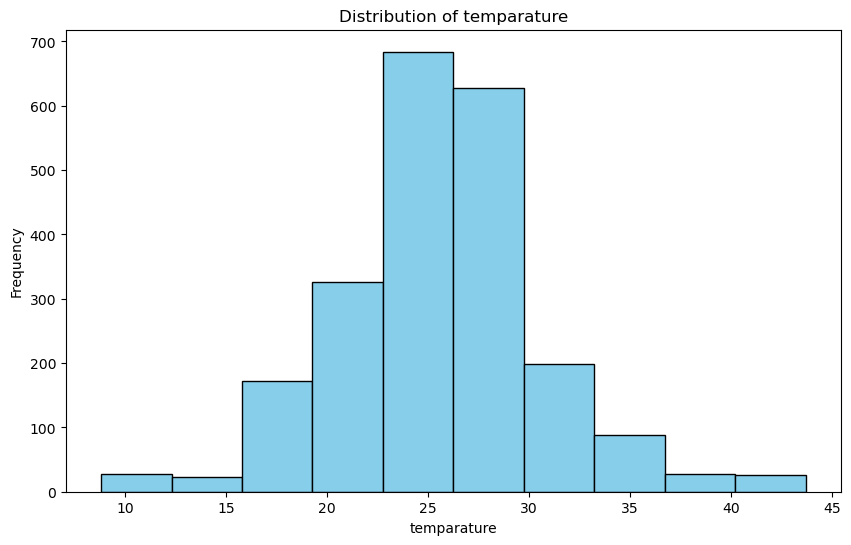

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of temparature')
plt.xlabel('temparature')
plt.ylabel('Frequency')
plt.show()

             temperature      rainfall
label                                 
apple        2263.094241  11265.477928
banana       2737.679831  10462.698040
blackgram    2997.333968   6788.415118
chickpea     1887.284675   8005.897726
coconut      2740.989217  17568.664580
coffee       2554.047682  15806.629488
cotton       2398.895790   8039.804312
grapes       2384.957512   6961.182889
jute         2495.837583  17479.279754
kidneybeans  2011.508469  10591.977754


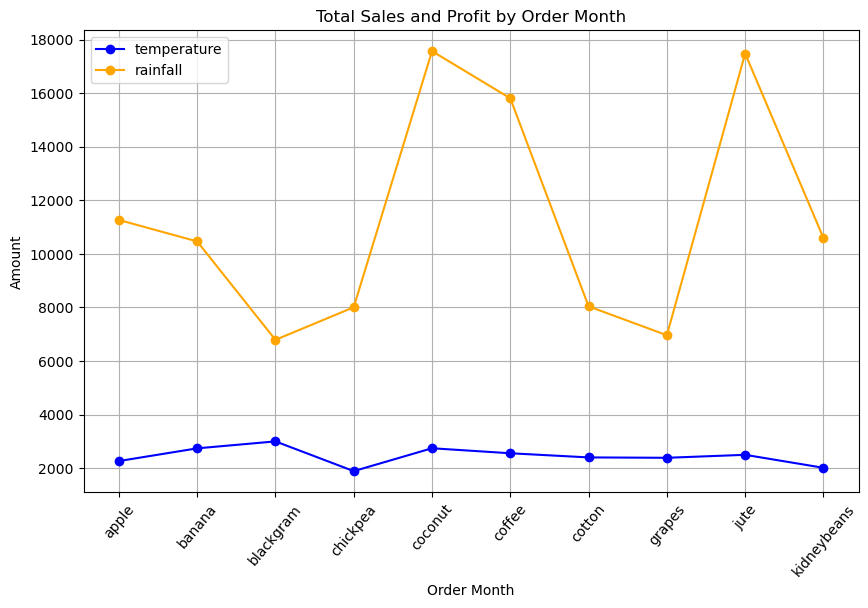

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Order Month' and sum the Sales and Profit
temp_humidity = data.groupby('label')[['temperature', 'rainfall']].sum().head(10)
print(temp_humidity)
# Plotting the data as a line graph
plt.figure(figsize=(10, 6))
plt.plot(temp_humidity.index, temp_humidity['temperature'], marker='o', label='temperature', color='blue')
plt.plot(temp_humidity.index, temp_humidity['rainfall'], marker='o', label='rainfall', color='orange')

# Customizing the plot
plt.title('Total Sales and Profit by Order Month')
plt.xlabel('Order Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=50)  # Ensure all months are shown on the x-axis
plt.show()

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
#fit and transform the data
data['label_encoder']=label.fit_transform(data['label'])
data

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoder
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [41]:
data['label_encoder'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [42]:
data.pop('label')
data

,N,P,K,temperature,humidity,ph,rainfall,label_encoder
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [43]:
x=data.drop("label_encoder",axis=1)
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [44]:
y=data["label_encoder"]
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label_encoder, Length: 2200, dtype: int32

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [46]:
x_train.shape

(1650, 7)

In [47]:
y_train.shape

(1650,)

In [48]:
x_test.shape

(550, 7)

In [49]:
y_test.shape

(550,)

In [50]:
#taking the logistic regression algorithm(sklearn.linear_model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #checking the accuracy (it will be same in all the model)

crop = LogisticRegression()

#model fitting(fit keyword is use to train the model)
crop.fit(x_train,y_train)

#testing tht model(predict keyword is use to test the model)
pred=crop.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))
print(pred)

0.9581818181818181
[ 3  2 19  8 21  9 18 18  3 20  7  7 13  0 11  6 13  9 21 13  7 15 16 20
 13 20  2 13 10  7  9  8 18  6 15 19  6  8 14 13 16 18  9  0  9  1 20  3
 11  9  3  0  8  6 17  6  9 17 17 17 21 11  3 14 13  5 15 16 18  6  0  5
 10 21 16  8 13 16  1 20 16 13  1 20  7  2  0 21  3 11  3  9 19 21 18 15
 11 14 17 13 15  4  6 13 13 14  3 18  1 13 10  1  3 21  2  5  0 13 18 21
 13 12  8 19  3 16 15  9 14 21 14  1 14  6  2  7 21 14 18 13 14  5 20 12
 20  0  7 20  6  2  0 16 14 18 21 19 13  6  5  3 14  9 11 13  0 15  2 20
 19 21 15 11  1  0  4 19  8 15 17 10  8 16  2  7 10  4 13 10  8 13  1  0
  3  4 20  7 18  7 18 17 21  2  4  5 10 10  8  0  5  1  6  1 20 12 11 14
 14  7  3  0 19 13  7  6 13 19 16 10 21  7 17  3  4 21 16 17 19  8 13  3
 17 15 11 14  6 12 16  8 12 14 12 15  0  2  3 11  3 18  7 15 16  0  5 15
 20  8  9 17 19  5  9 12  9 20  7 15 18  7 17  9 12  9  4 13  3 21 19 13
  2  2  0 13  8 12  5 14 13 18 17  2  3 20 20  5  0 19  6 14  1 20  4  5
 14 17 14 15 13  0  6  8  7 21  

In [51]:
data["label_encoder"].value_counts()

label_encoder
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
#taking the logistic regression algorithm(sklearn.linear_model)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score #checking the accuracy (it will be same in all the model)

crop1 = SVC()

#model fitting(fit keyword is use to train the model)
crop1.fit(x_train,y_train)

#testing tht model(predict keyword is use to test the model)
pred=crop1.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))
print(pred)

0.9709090909090909
[ 1 14  9  9 13 12  2  2  0 20  8 16 18 21  6  0  7  2 14 20  7 21  2 12
  1  8 10  1 17 18 17  8 17  1 10 10 10 20 16  3 16  8  3 11 21  7  3  7
  9 18 12 17 12 11 15  4 12  4  0  1 11 18  4 17 12 17  0 17  6  6  8 12
 14 10  0 10 13  3 15  2 10  8  6 16  8  6  6 20  7  3 10  2  6 14  6 13
 15 21  7 10  8 16  8 15 20  8 15 12 14 18  7  6  6  8 13 16  2  3 17 16
  9 15  0 19 18 17  0  4  5 18  1  6  9  9 15 15  1  1 10 14  3 19  0 16
  2  1  2  5 13 14 20  9  4 16  9  5 20  9  2  2 17 15 14  1 10  8 13  6
  6  5 12 20  6 12  5  8  5 16 15  0  6  3  8 11  8 12  8  7 11 15 12  6
 11  5 13  8  2 16 12 10  6  6 19 13  8 18 12 15  3  1 19 12 12 12 19 20
 14  8  7  5  1 15 20 20  7  7 14  9  9 18  8 16  2 13 21 18  4 20 19  9
  3  2 15 16  4  7  2 18 16 16  4  2  2  9 14  0 17 17 10 16  6  2  9 12
  4 18  8  2  3  6 11 10  1  0 12 11  9  6  0 10 15 15 10 13  3 19 10 12
 11 10  0 16 15 10  9 14 13  5 17  9 18  5 18  0  6 21  0 16  1 16  2 12
  4  1 16  3  5 14  9 17 16  9 1

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
#taking the logistic regression algorithm(sklearn.linear_model)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score #checking the accuracy (it will be same in all the model)

crop2 = RandomForestClassifier()

#model fitting(fit keyword is use to train the model)
crop2.fit(x_train,y_train)

#testing tht model(predict keyword is use to test the model)
pred=crop2.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))
print(pred)

0.9945454545454545
[17 15  7 12  8  8 14 19  1 18  5 19 12  8 15 13  0 21 14  8  3 12 10 11
  9  5  3 21 18 16 11 13 19 11 18  5  2  5 17  4  2  1 12 11  2 20 21 18
  5  8 11 20  3 18  8 13 19  5 10  8  3  6  8 13 14 11 18  8  5 12 12  7
 14 12  6  5 13  9 13  1 10 20  0  6  6  2 21  5 20 13 21 14  8 12 19 13
 19  8 10 17 19 12  1 18 19  2 21 13 20  6  9 15  0 14  0 11 17  6 12 14
  9 14  7  3 10 19 13  5  1 20  2  1  9  0  9 14 18  1 11  2  4  4  5  5
  8  9 17  6 11 12  4 11 18  5 13  2 20  0 14  3 13  1 12  1 10  7  5 12
 15  9 17 15 12 21 21 17 14 14 16 21  9  6 19 14 14  5 14 14  2  2  2 16
 21  5 21  8  8  8 17 14 11 10  2  6  0 11  0 12  9 16 11  5  2  3  4  7
  5  4 19  0  2 17  9 19 18  0 11  4 21 19  7 10 21  8  8  3 19  7  5 18
 12 14  4  5  2  2  0  3 18 18  2  2 20 16 17 13 18 13 15  8  8  1 13 19
 21  3 14  2  4  2 20 18 14  2  9  9  2 21  5  0 19  3 20  0 12 18 21  0
 17  9 17 17 13 15 20  9  5  4 11 14 12 17  1 18  1  9 18 10 11 14 19  0
 10 11  5  3  6  3  9  8  3 16  

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [55]:
data.loc[[101,201,401]]

,N,P,K,temperature,humidity,ph,rainfall,label_encoder
101,61,44,17,26.100184,71.574769,6.931757,102.266244,11
201,23,72,84,19.020613,17.131591,6.920251,79.926981,3
401,40,59,23,36.891637,62.731782,5.269085,163.726655,18


In [56]:
data.loc[101:110:2]

,N,P,K,temperature,humidity,ph,rainfall,label_encoder
101,61,44,17,26.100184,71.574769,6.931757,102.266244,11
103,73,58,21,19.972160,57.682729,6.596061,60.651715,11
105,68,41,16,21.776893,57.808406,6.158831,102.086169,11
107,89,60,19,25.191924,66.690290,5.913665,78.066396,11
109,67,60,25,24.921622,66.786274,5.750255,109.216228,11


In [57]:
def predict_crops():
    nitrogen = int(input("Enter nitrogen ratio (e.g., 0 to 140): "))
    phosphorus = int(input("Enter phosphorus ratio (e.g., 5 to 145): "))
    potassium = int(input("Enter potassium ratio (e.g., 5 to 205): "))
    temperature = float(input("Enter temperature (e.g., 8.83°C to 43.68°C): "))
    humidity = float(input("Enter humidity (e.g., 14.26% to 99.98%): "))
    ph = float(input("Enter pH (e.g., 3.50 to 9.94): "))
    rainfall = float(input("Enter rainfall (e.g., 20.21 mm to 298.56): "))

    inputs = [
        nitrogen,
        phosphorus,
        potassium,
        temperature,
        humidity,
        ph,
        rainfall
    ]

    prediction = crop2.predict([inputs])[0]

    # Mapping of prediction output to crop names
    crop_names = {
        0: "apple",
        1: "banana",
        2: "blackgram",
        3: "chickpea",
        4: "coconut",
        5: "coffee",
        6: "cotton",
        7: "grapes",
        8: "jute",
        9: "kidneybeans",
        10: "lentil",
        11: "maize",
        12: "mango",
        13: "mothbeans",
        14: "mungbean",
        15: "muskmelon",
        16: "orange",
        17: "papaya",
        18: "pigeonpeas",
        19: "pomegranate",
        20: "rice",
        21: "watermelon"
    }

    # Return the crop name based on the prediction
    return crop_names.get(prediction, "Unknown Crop")

# Call the function and print the result
result = predict_crops()
print("Prediction:", result)


Enter nitrogen ratio (e.g., 0 to 140):  5
Enter phosphorus ratio (e.g., 5 to 145):  7
Enter potassium ratio (e.g., 5 to 205):  90
Enter temperature (e.g., 8.83°C to 43.68°C):  800
Enter humidity (e.g., 14.26% to 99.98%):  89
Enter pH (e.g., 3.50 to 9.94):  78
Enter rainfall (e.g., 20.21 mm to 298.56):  90


Prediction: chickpea


In [58]:
# def predict_crops():
#     nitrogen = int(input("enter ratio(e.g,. 0 to 140):"))
#     phosphorus = int(input("enter ratio(e.g,.5 to 145):"))
#     potassium = int(input("enter ratio(e.g,.5 to 205):"))
#     temperature = float(input("enter temperature(e.g,.8.83°C to 43.68°C):"))
#     humidity = float(input("enter humidity(e.g,.14.26% to 99.98%):"))
#     ph = float(input("enter ph(e.g,.3.50 to 9.94):"))
#     rainfall = float(input("enter rainfall(e.g,.20.21 mm to 298.56):"))

#     inputs = [
#      nitrogen,9
#      phosphorus,
#      potassium,
#      temperature,
#      humidity,
#      ph,
#      rainfall
#     ]

#     prediction = crop2.predict([inputs])[0]

#     #return the result
#     #
#     return "rice" if prediction ==20  else"No "
    
 
# #call the function and print the result
# result = predict_crops()
# print("Prediction:",result)

In [60]:
def predict_crops():
    nitrogen = int(input("Enter nitrogen ratio (e.g., 0 to 140): "))
    phosphorus = int(input("Enter phosphorus ratio (e.g., 5 to 145): "))
    potassium = int(input("Enter potassium ratio (e.g., 5 to 205): "))
    temperature = float(input("Enter temperature (e.g., 8.83°C to 43.68°C): "))
    humidity = float(input("Enter humidity (e.g., 14.26% to 99.98%): "))
    ph = float(input("Enter pH (e.g., 3.50 to 9.94): "))
    rainfall = float(input("Enter rainfall (e.g., 20.21 mm to 298.56): "))

    inputs = [
        nitrogen,
        phosphorus,
        potassium,
        temperature,
        humidity,
        ph,
        rainfall
    ]

    prediction = crop2.predict([inputs])[0]

    # List of crop names corresponding to prediction values
    crop_names = [
        "apple", "banana", "blackgram", "chickpea", "coconut", "coffee",
        "cotton", "grapes", "jute", "kidneybeans", "lentil", "maize",
        "mango", "mothbeans", "mungbean", "muskmelon", "orange", "papaya",
        "pigeonpeas", "pomegranate", "rice", "watermelon"
    ]

    # Using a for loop to find the matching crop
    for index in range(len(crop_names)):
        if prediction == index:
            return crop_names[index]

    return "Unknown Crop"

# Call the function and print the result
result = predict_crops()
print("Prediction:", result)


Enter nitrogen ratio (e.g., 0 to 140):  33
Enter phosphorus ratio (e.g., 5 to 145):  44
Enter potassium ratio (e.g., 5 to 205):  66
Enter temperature (e.g., 8.83°C to 43.68°C):  88
Enter humidity (e.g., 14.26% to 99.98%):  90
Enter pH (e.g., 3.50 to 9.94):  90
Enter rainfall (e.g., 20.21 mm to 298.56):  78


Prediction: papaya


In [ ]:
def predict_crops():
    nitrogen = int(input("Enter nitrogen ratio (e.g., 0 to 140): "))
    phosphorus = int(input("Enter phosphorus ratio (e.g., 5 to 145): "))
    potassium = int(input("Enter potassium ratio (e.g., 5 to 205): "))
    temperature = float(input("Enter temperature (e.g., 8.83°C to 43.68°C): "))
    humidity = float(input("Enter humidity (e.g., 14.26% to 99.98%): "))
    ph = float(input("Enter pH (e.g., 3.50 to 9.94): "))
    rainfall = float(input("Enter rainfall (e.g., 20.21 mm to 298.56): "))

    inputs = [
        nitrogen,
        phosphorus,
        potassium,
        temperature,
        humidity,
        ph,
        rainfall
    ]

    prediction = crop2.predict([inputs])[0]
  

    # List of crop names corresponding to prediction values
    crop_names = [
        "apple", "banana", "blackgram", "chickpea", "coconut", "coffee",
        "cotton", "grapes", "jute", "kidneybeans", "lentil", "maize",
        "mango", "mothbeans", "mungbean", "muskmelon", "orange", "papaya",
        "pigeonpeas", "pomegranate", "rice", "watermelon"
    ]

    index = 0
    while index < len(crop_names):
        if prediction == index:
            return crop_names[index]
        index += 1

    return "Unknown Crop"

# Call the function and print the result
result = predict_crops()
print("Prediction:", result)


In [61]:
def predict_crops():
    nitrogen = int(input("Enter nitrogen ratio (e.g., 0 to 140): "))
    phosphorus = int(input("Enter phosphorus ratio (e.g., 5 to 145): "))
    potassium = int(input("Enter potassium ratio (e.g., 5 to 205): "))
    temperature = float(input("Enter temperature (e.g., 8.83°C to 43.68°C): "))
    humidity = float(input("Enter humidity (e.g., 14.26% to 99.98%): "))
    ph = float(input("Enter pH (e.g., 3.50 to 9.94): "))
    rainfall = float(input("Enter rainfall (e.g., 20.21 mm to 298.56): "))

    inputs = [
        nitrogen,
        phosphorus,
        potassium,
        temperature,
        humidity,
        ph,
        rainfall
    ]

    prediction = crop2.predict([inputs])[0]

    # Mapping prediction output to crop names using if-elif-else statements
    if prediction == 0:
        return "apple"
    elif prediction == 1:
        return "banana"
    elif prediction == 2:
        return "blackgram"
    elif prediction == 3:
        return "chickpea"
    elif prediction == 4:
        return "coconut"
    elif prediction == 5:
        return "coffee"
    elif prediction == 6:
        return "cotton"
    elif prediction == 7:
        return "grapes"
    elif prediction == 8:
        return "jute"
    elif prediction == 9:
        return "kidneybeans"
    elif prediction == 10:
        return "lentil"
    elif prediction == 11:
        return "maize"
    elif prediction == 12:
        return "mango"
    elif prediction == 13:
        return "mothbeans"
    elif prediction == 14:
        return "mungbean"
    elif prediction == 15:
        return "muskmelon"
    elif prediction == 16:
        return "orange"
    elif prediction == 17:
        return "papaya"
    elif prediction == 18:
        return "pigeonpeas"
    elif prediction == 19:
        return "pomegranate"
    elif prediction == 20:
        return "rice"
    elif prediction == 21:
        return "watermelon"
    else:
        return "Unknown Crop"

# Call the function and print the result
result = predict_crops()
print("Prediction:", result)


Enter nitrogen ratio (e.g., 0 to 140):  22
Enter phosphorus ratio (e.g., 5 to 145):  23
Enter potassium ratio (e.g., 5 to 205):  78
Enter temperature (e.g., 8.83°C to 43.68°C):  22.2
Enter humidity (e.g., 14.26% to 99.98%):  12
Enter pH (e.g., 3.50 to 9.94):  22
Enter rainfall (e.g., 20.21 mm to 298.56):  222


Prediction: chickpea
